<center> <h1 style="background-color:purple; color:white">Financial Analysis</h1></center>

## ` Problem Statement`
Use the provided dataset to analyze competition among India's top 500 companies. Identify the key metrics, factors, and attribute relationships.

`1. Loading data`

<left><h4 style="color:aqua">Load a dataset for analysis.</h4></left>

### `Importing the necessary libraries`

In [364]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings("ignore")
sns.set(color_codes=True)
%matplotlib inline

In [365]:
# Load the data
df = pd.read_csv("C:/Users/tirum/Downloads/Financial Analytics data (1).csv")

# Display the first five rows
print("Top 5 rows of the dataset:")
print(df.head())


Top 5 rows of the dataset:
   S.No.            Name  Mar Cap - Crore  Sales Qtr - Crore  Unnamed: 4
0      1  Reliance Inds.        583436.72           99810.00         NaN
1      2             TCS        563709.84           30904.00         NaN
2      3       HDFC Bank        482953.59           20581.27         NaN
3      4             ITC        320985.27            9772.02         NaN
4      5         H D F C        289497.37           16840.51         NaN


In [366]:
# Display the shape of the dataset
print("\nShape of the dataset:")
print(df.shape)


Shape of the dataset:
(488, 5)


Now we observe the each features present in the dataset.<br>
`S.No`: Serial number<br>
`Name`: Name of the company<br>
`Mar Cap-Crore`: Market Capitalization in Crores<br>
`Sales Qtr-Crore`: Quarterly Sales in crores<br>
`Unnamed:4`: The "Unnamed" field is most likely empty or without data.

`2. Exploring the Data`

In [367]:
# Display information about the dataset
print("\nInformation about the dataset:")
print(df.info())


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              488 non-null    int64  
 1   Name               488 non-null    object 
 2   Mar Cap - Crore    479 non-null    float64
 3   Sales Qtr - Crore  365 non-null    float64
 4   Unnamed: 4         94 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 19.2+ KB
None


<left> <h4 style="color:aqua">Find out the datatypes for each column and the total number of records in each.
</h1></left>

In [368]:
df.dtypes

S.No.                  int64
Name                  object
Mar Cap - Crore      float64
Sales Qtr - Crore    float64
Unnamed: 4           float64
dtype: object

<left><h4 style="color:aqua">Renaming the columns</h4></left>
##### The below dictionary is used to stored the column renames.


In [369]:
rename_cols=({
    'Mar Cap - Crore':'Market Capitalization',
    'Sales Qtr - Crore':'Quarterly Sales',
    'Name':'Company'	
    
})

df = df.rename(rename_cols, axis=1)
df.head(3)

,S.No.,Company,Market Capitalization,Quarterly Sales,Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN


`3. Data Cleaning`

<left><h4 style="color:aqua">Drop irrelevant Columns</h4></left>
This dataset contains an irrelevant columns. So, drop the columns from the data frame.

In [370]:
# Drop irrelevant columns
col_to_drop = ["Unnamed: 4"]
df = df.drop(col_to_drop, axis=1)

print("\nColumns after dropping irrelevant ones:")
print(df.columns)



Columns after dropping irrelevant ones:
Index(['S.No.', 'Company', 'Market Capitalization', 'Quarterly Sales'], dtype='object')


Here I drop the'unnamed: 4'.These feature are not neccessary to obtain the model's accucary. It does not contain any relevant information in the dataset. 

<left><h4 style="color:lightgreen">Check how many duplicate rows are present in the given dataset & drop that rows</h4></left>


In [371]:
# Check for duplicates
print("\nNumber of duplicated rows:")
print(df.duplicated().sum())


Number of duplicated rows:
0


In this dataset there is no duplicate rows.

<left><h4 style="color:aqua">Dropping the null or missing values</h4></left>
Missing values in a dataset are represented as Nan, null, or None. The isnull() function is used to identify null values. Many missing values, referred to as np.nan, cannot be used for model training. To simplify, nan values are dropped to replace them with other values.

In [372]:
# Check for missing values
print("\nNumber of missing values in each column:")
print(df.isnull().sum())



Number of missing values in each column:
S.No.                      0
Company                    0
Market Capitalization      9
Quarterly Sales          123
dtype: int64


If you observe that the Market Capitalization and Quarterly Sales have null values of 9 and 123.The accuracy of the models will be impacted by these null values. Thus we will remove these variables to prevent the impact. Since there won't have a significant impact on the model's accuracy due to the small sample size of these variables, they will be dropped.


In [373]:
# Drop rows with missing values
df = df.dropna()


In [374]:
# Recheck for missing values
print("\nNumber of missing values in each column after dropping missing values:")
print(df.isnull().sum())


Number of missing values in each column after dropping missing values:
S.No.                    0
Company                  0
Market Capitalization    0
Quarterly Sales          0
dtype: int64


In [375]:
# Identify columns with numeric data
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("\nNumeric columns:")
print(numeric_cols)


Numeric columns:
['S.No.', 'Market Capitalization', 'Quarterly Sales']


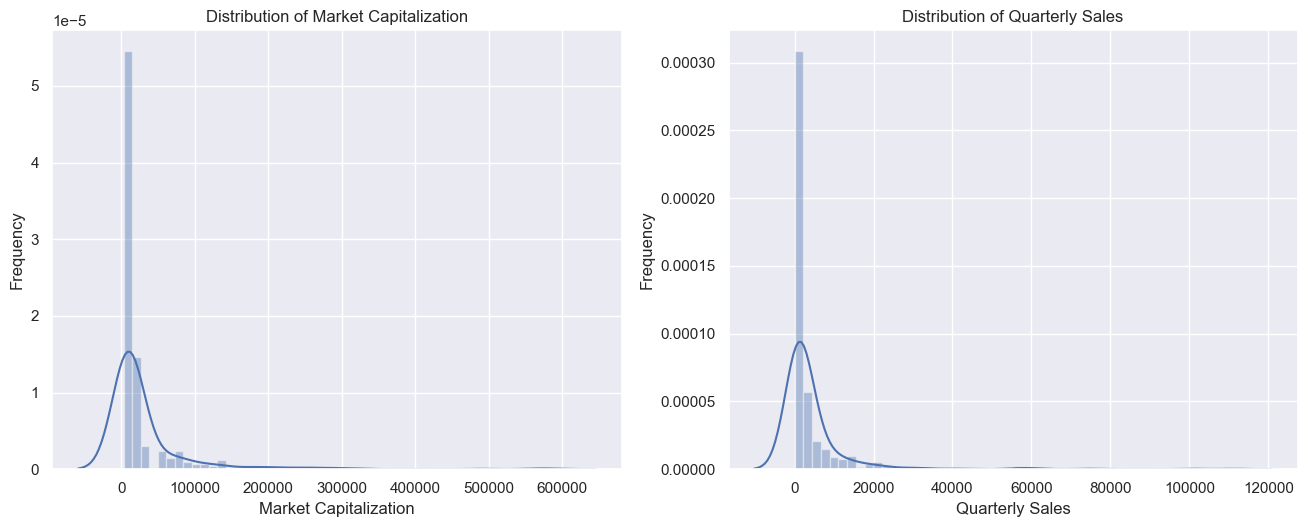

In [376]:
# plot all the columns present in list l together using subplot of dimention (2,3).
l=['Market Capitalization','Quarterly Sales']

c=0
plt.figure(figsize=(20,10))
for i in l:
   plt.subplot(2, 3, c + 1)
   sns.distplot(df[i], kde=True)
   plt.title(f'Distribution of {i}')
   plt.xlabel(i)
   plt.ylabel('Frequency')
   c += 1

# Show the plots
plt.tight_layout()
plt.show()


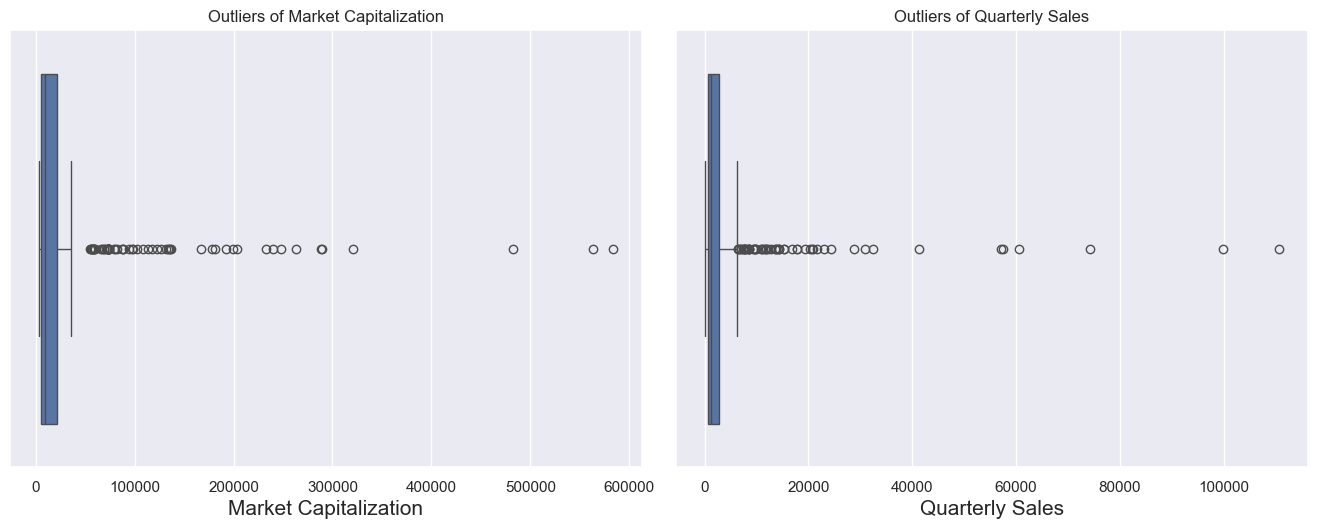

In [377]:
# Removing outliers
plt.figure(figsize=(20, 10))
c=0
for i in l:
    plt.subplot(2, 3, c + 1)
    sns.boxplot(x=df[i], orient='h')
    plt.title(f'Outliers of {i}')
    plt.xlabel(i, size=15)
    c += 1
plt.tight_layout()
plt.show()

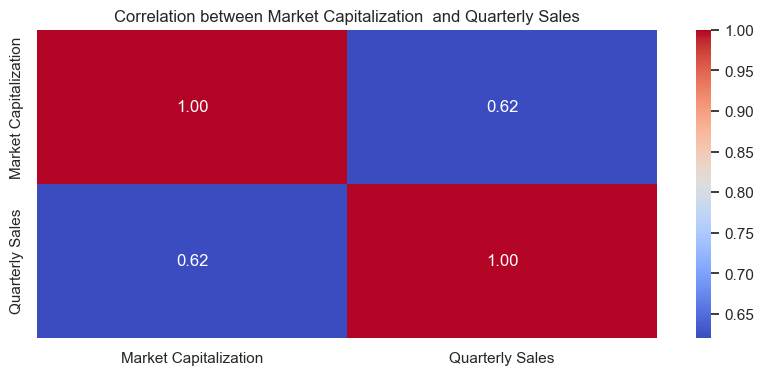

In [378]:
# Correlation matrix
corr_matrix = df[['Market Capitalization', 'Quarterly Sales']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Market Capitalization  and Quarterly Sales')
plt.show()


In [379]:
# Describe statistics of the dataset
print("\nDescriptive statistics of the dataset:")
print(df.describe())


Descriptive statistics of the dataset:
            S.No.  Market Capitalization  Quarterly Sales
count  365.000000             365.000000       365.000000
mean   250.435616           31300.970301      4395.976849
std    147.106354           67224.641338     11092.206185
min      1.000000            3017.070000        47.240000
25%    133.000000            5089.870000       593.740000
50%    264.000000            9097.330000      1278.300000
75%    363.000000           21372.180000      2840.750000
max    499.000000          583436.720000    110666.930000


In [380]:
total_mc = df['Market Capitalization'].sum()
print("\nTotal Market Capitalization is:", total_mc)
total_qs = df['Quarterly Sales'].sum()
print("\nTotal Quarterly Sales is:", total_qs)

average_mc = df['Market Capitalization'].mean()
print("\nAverage of Market Capitalization", average_mc)
average_qs = df['Quarterly Sales'].mean()
print("\nAverage of Quarterly Sales", average_qs)



Total Market Capitalization is: 11424854.16

Total Quarterly Sales is: 1604531.55

Average of Market Capitalization 31300.970301369864

Average of Quarterly Sales 4395.976849315069


In [381]:
df.head(5)

,S.No.,Company,Market Capitalization,Quarterly Sales
0,1,Reliance Inds.,583436.72,99810.00
1,2,TCS,563709.84,30904.00
2,3,HDFC Bank,482953.59,20581.27
3,4,ITC,320985.27,9772.02
4,5,H D F C,289497.37,16840.51


In [382]:
# Calculate yearly sales by multiplying quarterly sales by 4
df['Yearly Sales'] = df['Quarterly Sales'] * 4


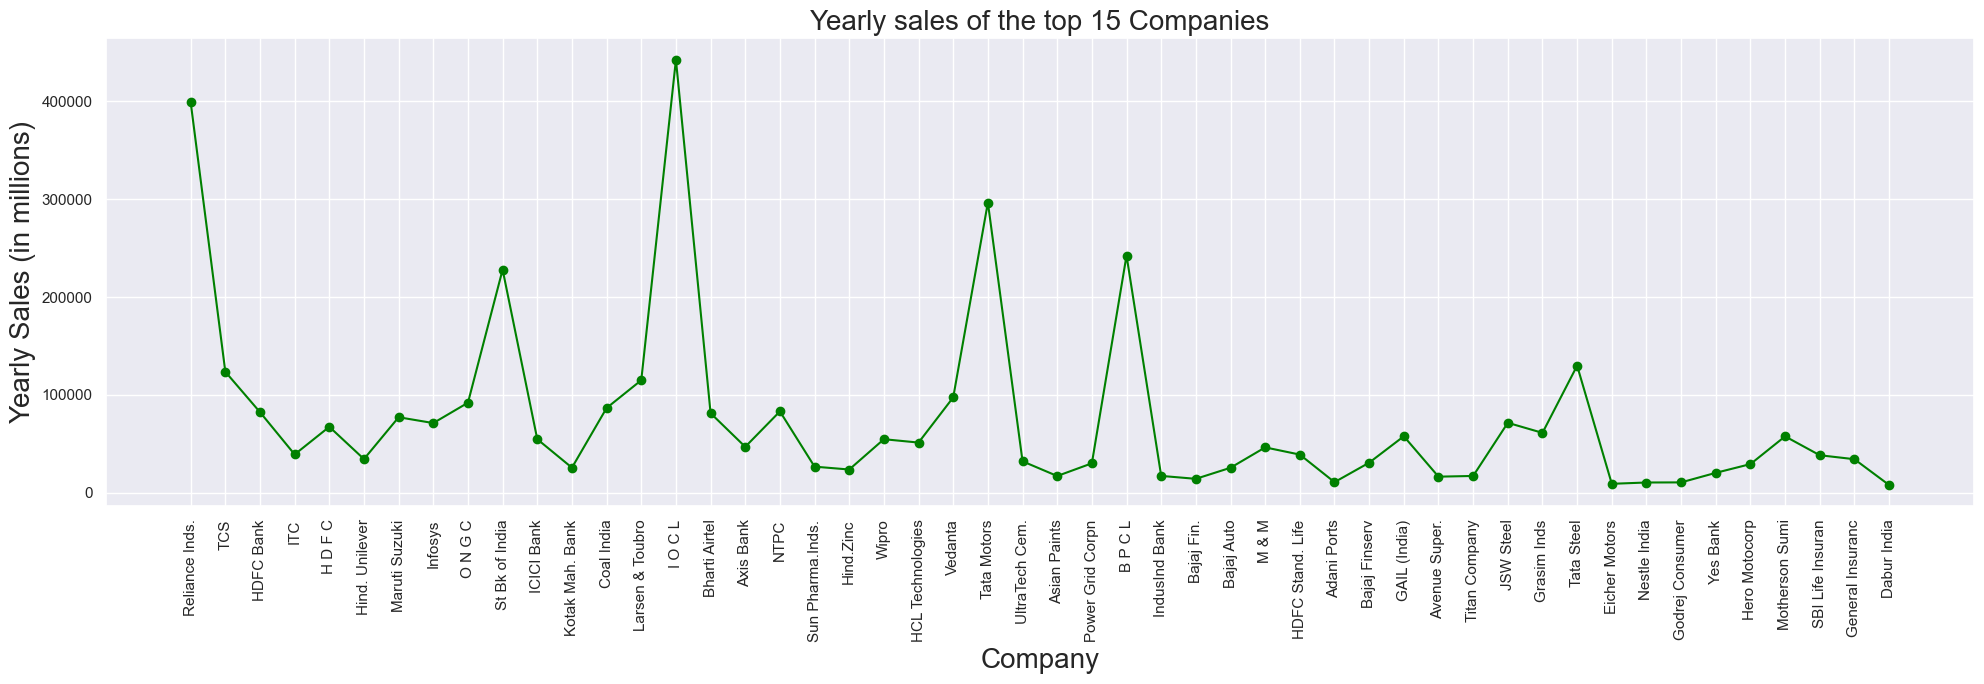

In [383]:
# Sort the dataframe by Market Capitalization and select the top 15 companies
top_50_df = df.nlargest(50, 'Market Capitalization')

# Create a line graph for yearly sales of the top 15 companies
plt.figure(figsize=(20, 7))
plt.plot(top_50_df['Company'], top_50_df['Yearly Sales'], marker='o', linestyle='-', color='green')
plt.xlabel('Company',fontsize=20)
plt.ylabel('Yearly Sales (in millions)', fontsize=20)
plt.title('Yearly sales of the top 15 Companies',fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

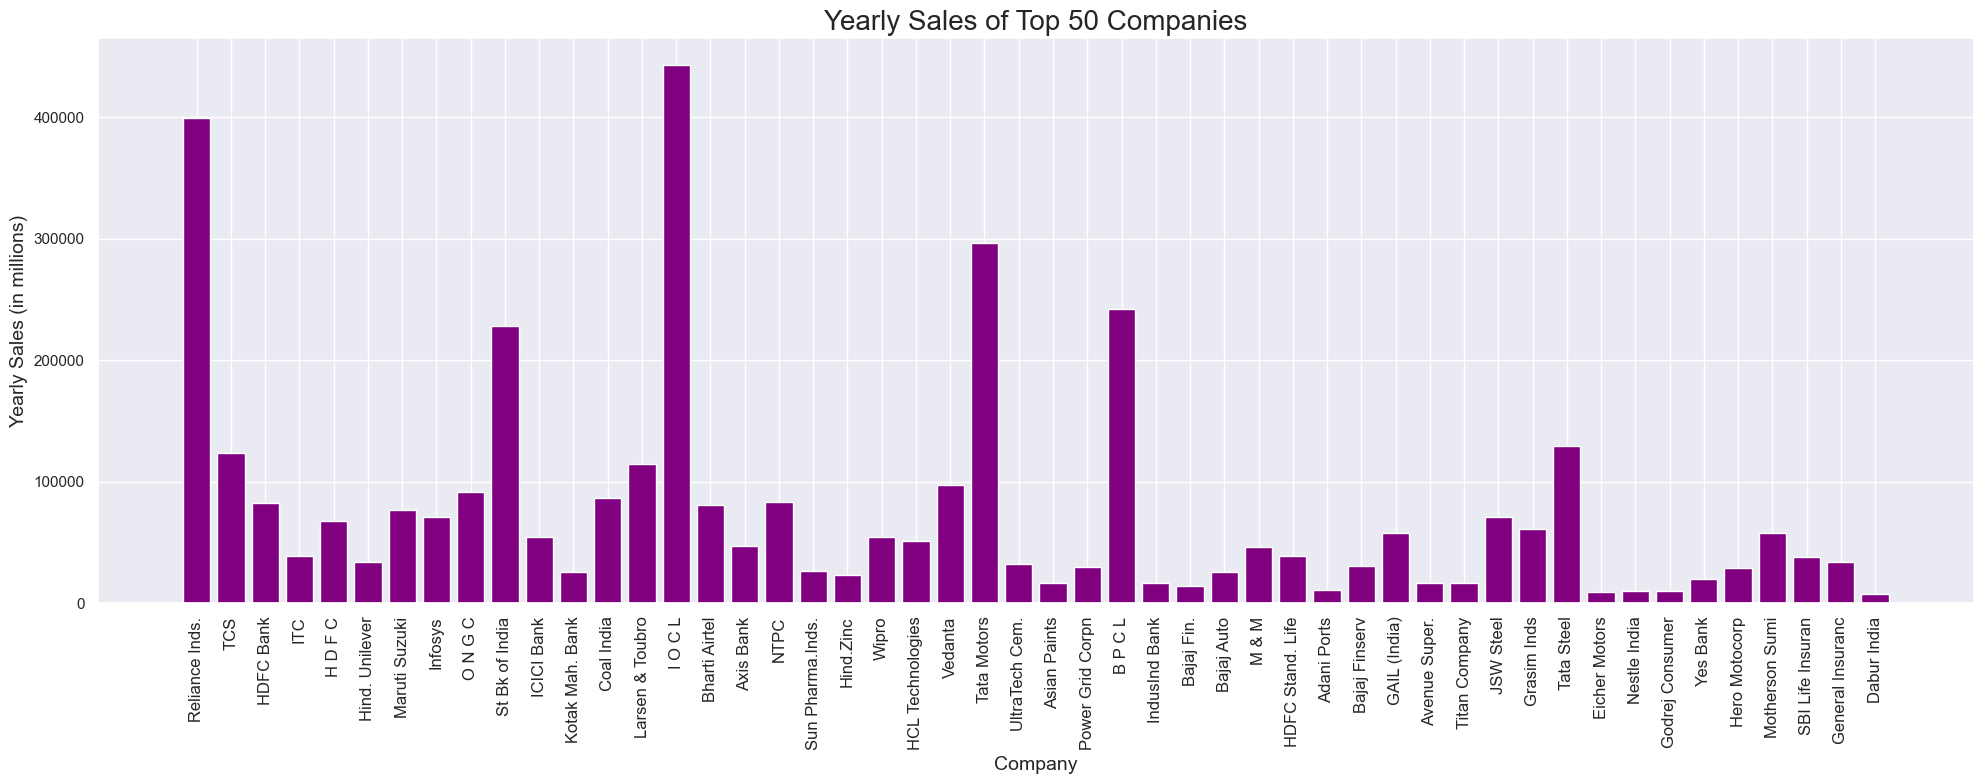

In [384]:
# Create a bar graph for yearly sales
plt.figure(figsize=(20, 8))
plt.bar(top_50_df['Company'], top_50_df['Yearly Sales'],color='purple')
plt.xlabel('Company', fontsize=14)
plt.ylabel('Yearly Sales (in millions)', fontsize=14)
plt.title('Yearly Sales of Top 50 Companies', fontsize=20)
plt.xticks(rotation=90, fontsize=12)
plt.tight_layout()
plt.show()

In [385]:
# Sort companies and market capitalization in descending order of market cap
sorted_data = sorted(zip(df['Company'], df['Market Capitalization']), key=lambda x: x[1], reverse=True)

# Separate out top 25 companies with highest and lowest market cap
top_25_high_mar = sorted_data[:25]
print(top_25_high_mar)

# Extract company names and market cap values for plotting
top_25_highest_companies, top_25_highest_caps = zip(*top_25_high_mar)


[('Reliance Inds.', 583436.72), ('TCS', 563709.84), ('HDFC Bank', 482953.59), ('ITC', 320985.27), ('H D F C', 289497.37), ('Hind. Unilever', 288265.26), ('Maruti Suzuki', 263493.81), ('Infosys', 248320.35), ('O N G C', 239981.5), ('St Bk of India', 232763.33), ('ICICI Bank', 203802.35), ('Kotak Mah. Bank', 199253.77), ('Coal India', 192677.98), ('Larsen & Toubro', 180860.74), ('I O C L', 178017.48), ('Bharti Airtel', 167131.29), ('Axis Bank', 136380.76), ('NTPC', 135390.53), ('Sun Pharma.Inds.', 134241.36), ('Hind.Zinc', 133266.56), ('Wipro', 131840.57), ('HCL Technologies', 126335.27), ('Vedanta', 122184.17), ('Tata Motors', 117071.87), ('UltraTech Cem.', 113692.87)]


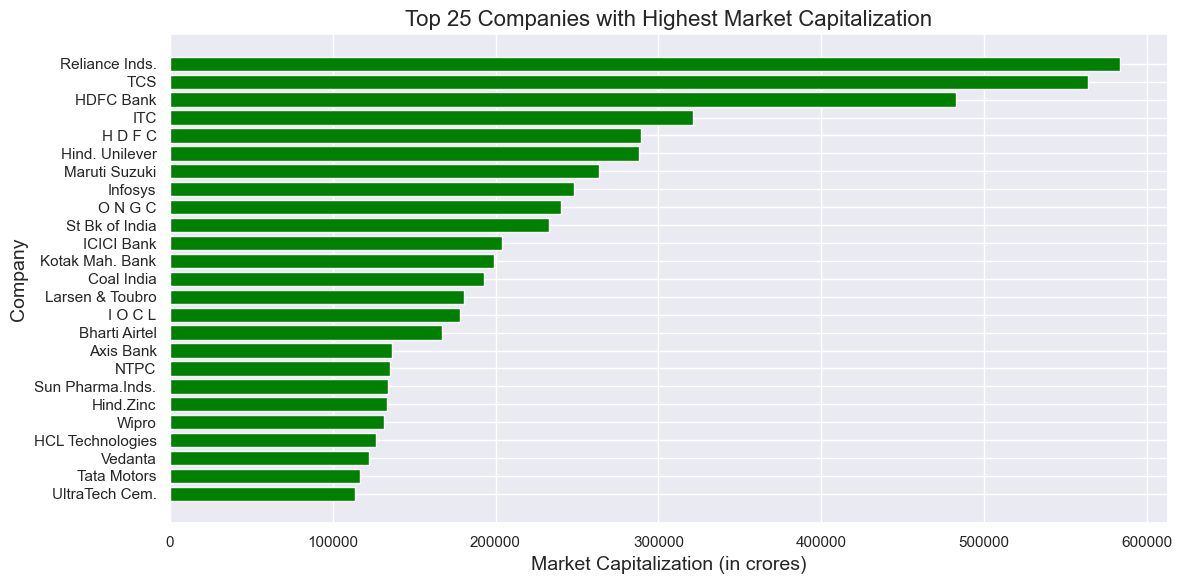

In [386]:
# Plotting the bar graph for top 25 highest market capitalizations
plt.figure(figsize=(12, 6))
plt.barh(top_25_highest_companies, top_25_highest_caps, color='green')
plt.xlabel('Market Capitalization (in crores)', fontsize=14)
plt.ylabel('Company', fontsize=14)
plt.title('Top 25 Companies with Highest Market Capitalization', fontsize=16)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest market cap at the top
plt.tight_layout()
plt.show()

In [387]:
sorted_data = sorted(zip(df['Company'], df['Market Capitalization']), key=lambda x: x[1], reverse=False)

top_25_low_mar = sorted_data[:25]
print(top_25_low_mar)
top_25_lowest_companies, top_25_lowest_caps = zip(*top_25_low_mar)



[('Natl.Fertilizer', 3017.07), ('Orient Cement', 3024.32), ('NOCIL', 3026.26), ('Lak. Vilas Bank', 3029.57), ('Prime Focus', 3031.5), ('Va Tech Wabag', 3041.93), ('Deepak Fert.', 3079.06), ('Star Ferro Cem.', 3115.98), ('Kaveri Seed Co.', 3125.83), ('Firstsour.Solu.', 3139.94), ('Navneet Educat.', 3148.36), ('Mah. Seamless', 3164.73), ('Heritage Foods', 3185.45), ('Mahindra Logis.', 3187.51), ('Dhanuka Agritech', 3188.62), ('Hathway Cable', 3189.1), ('ITD Cem', 3192.67), ('Tejas Networks', 3209.89), ('Puravankara', 3274.9), ('Central Dep. Ser', 3316.31), ('Sonata Software', 3329.58), ('Repco Home Fin', 3331.08), ('Prakash Inds.', 3336.05), ('Thyrocare Tech.', 3374.38), ('MAS FINANC SER', 3376.2)]


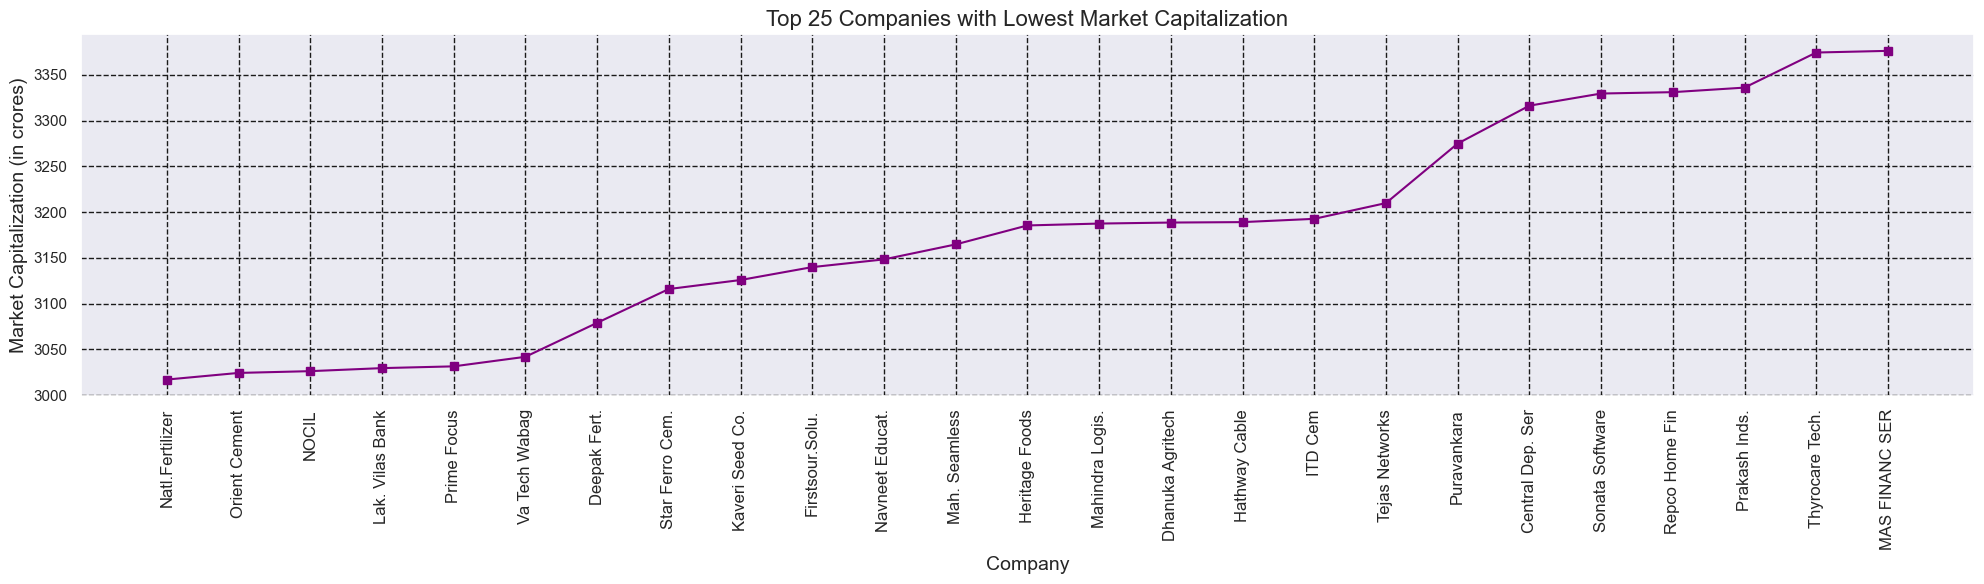

In [388]:
# Plotting the line graph for top 25 lowest Market Capitalization
plt.figure(figsize=(20, 6))
plt.plot(top_25_lowest_companies,top_25_lowest_caps, marker='s', linestyle='-', color='purple')
plt.xlabel('Company', fontsize=14)
plt.ylabel('Market Capitalization (in crores)', fontsize=14)
plt.title('Top 25 Companies with Lowest Market Capitalization', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.tight_layout()
plt.grid(color='k',linestyle='--')
plt.show()

In [389]:
# Hihg sales to low sales
sorted_data = sorted(zip(df['Company'], df['Quarterly Sales']), key=lambda x: x[1], reverse=True)

# Separate out top 25 companies with highest and lowest quarterly sales
top_25_high_sales = sorted_data[:25]
print(top_25_high_sales)


[('I O C L', 110666.93), ('Reliance Inds.', 99810.0), ('Tata Motors', 74156.07), ('B P C L', 60616.36), ('H P C L', 57474.25), ('St Bk of India', 57014.08), ('Rajesh Exports', 41304.84), ('Tata Steel', 32464.14), ('TCS', 30904.0), ('Larsen & Toubro', 28747.45), ('Vedanta', 24361.0), ('O N G C', 22995.88), ('Coal India', 21643.28), ('NTPC', 20774.37), ('HDFC Bank', 20581.27), ('Bharti Airtel', 20318.6), ('Maruti Suzuki', 19283.2), ('JSW Steel', 17861.0), ('Infosys', 17794.0), ('H D F C', 16840.51), ('S A I L', 15323.65), ('Grasim Inds', 15291.42), ('GAIL (India)', 14414.34), ('Motherson Sumi', 14397.85), ('M R P L', 14100.98)]


In [390]:

# Extract company names and quarterly sales values for plotting
top_25_highest_companies, top_25_highest_sales = zip(*top_25_high_sales)


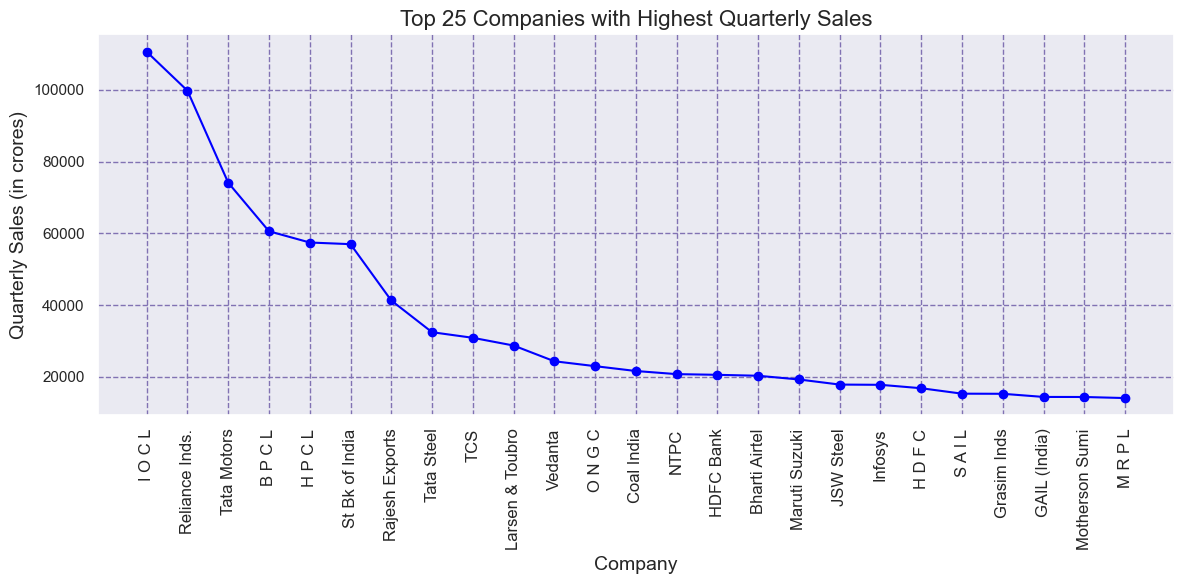

In [391]:
# Plotting the line graph for top 25 highest quarterly sales
plt.figure(figsize=(12, 6))
plt.plot(top_25_highest_companies, top_25_highest_sales, marker='o', linestyle='-', color='blue')
plt.xlabel('Company', fontsize=14)
plt.ylabel('Quarterly Sales (in crores)', fontsize=14)
plt.title('Top 25 Companies with Highest Quarterly Sales', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.tight_layout()
plt.grid(color='m',linestyle='--')

# Display the line graph
plt.show()


In [392]:
# Low sales to Hihg sales
sorted_data = sorted(zip(df['Company'], df['Quarterly Sales']), key=lambda x: x[1], reverse=False)

top_25_low_sales = sorted_data[:25]
print(top_25_low_sales)
# Extract company names and quarterly sales values for plotting
top_25_lowest_companies, top_25_lowest_sales = zip(*top_25_low_sales)

[('Central Dep. Ser', 47.24), ('La Opala RG', 69.77), ('Kaveri Seed Co.', 70.64), ('Thyrocare Tech.', 77.84), ('I T D C', 102.14), ('MAS FINANC SER', 112.05), ('Zydus Wellness', 132.4), ('Hathway Cable', 138.65), ('Ent.Network', 148.42), ('Guj Pipavav Port', 162.68), ('Triveni Turbine', 165.59), ('Navneet Educat.', 174.41), ('Shilpa Medicare', 185.53), ('Sunteck Realty', 201.5), ('Infibeam Incorp.', 213.48), ('Symphony', 217.63), ('Navin Fluo.Intl.', 221.45), ('Dhanuka Agritech', 221.51), ('Tejas Networks', 229.87), ('Indiabulls Vent.', 238.43), ('VST Inds.', 238.97), ('FDC', 248.77), ('NOCIL', 249.27), ('ITI', 250.97), ('Excel Crop Care', 258.65)]


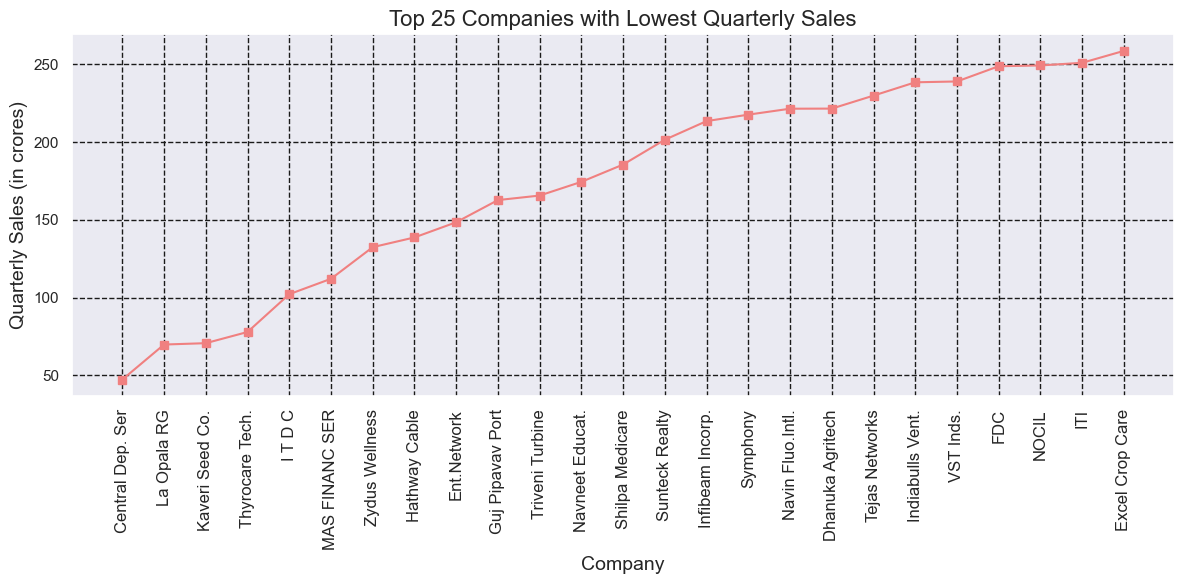

In [393]:
# Plotting the line graph for top 25 lowest quarterly sales
plt.figure(figsize=(12, 6))
plt.plot(top_25_lowest_companies, top_25_lowest_sales, marker='s', linestyle='-', color='lightcoral')
plt.xlabel('Company', fontsize=14)
plt.ylabel('Quarterly Sales (in crores)', fontsize=14)
plt.title('Top 25 Companies with Lowest Quarterly Sales', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.tight_layout()
plt.grid(color='k',linestyle='--')
plt.show()

In [394]:
# Calculate total quarterly sales
total_qs = df['Quarterly Sales'].sum()
# Calculate the percentage contribution of quarterly sales
df['Sales Contribution (%)'] = (df['Quarterly Sales'] / total_qs) * 100


In [395]:
# Rank companies by quarterly sales
df['Sales Rank'] = df['Quarterly Sales'].rank(ascending=False)

print(df[['Company', 'Quarterly Sales', 'Sales Contribution (%)', 'Sales Rank']])

             Company  Quarterly Sales  Sales Contribution (%)  Sales Rank
0     Reliance Inds.         99810.00                6.220507         2.0
1                TCS         30904.00                1.926045         9.0
2          HDFC Bank         20581.27                1.282696        15.0
3                ITC          9772.02                0.609026        38.0
4            H D F C         16840.51                1.049559        20.0
..               ...              ...                     ...         ...
482      Prime Focus           609.61                0.037993       270.0
483  Lak. Vilas Bank           790.17                0.049246       235.0
484            NOCIL           249.27                0.015535       343.0
485    Orient Cement           511.53                0.031880       290.0
486  Natl.Fertilizer          2840.75                0.177045        92.0

[365 rows x 4 columns]


In [396]:
top_25 = df.nlargest(50, 'Market Capitalization')

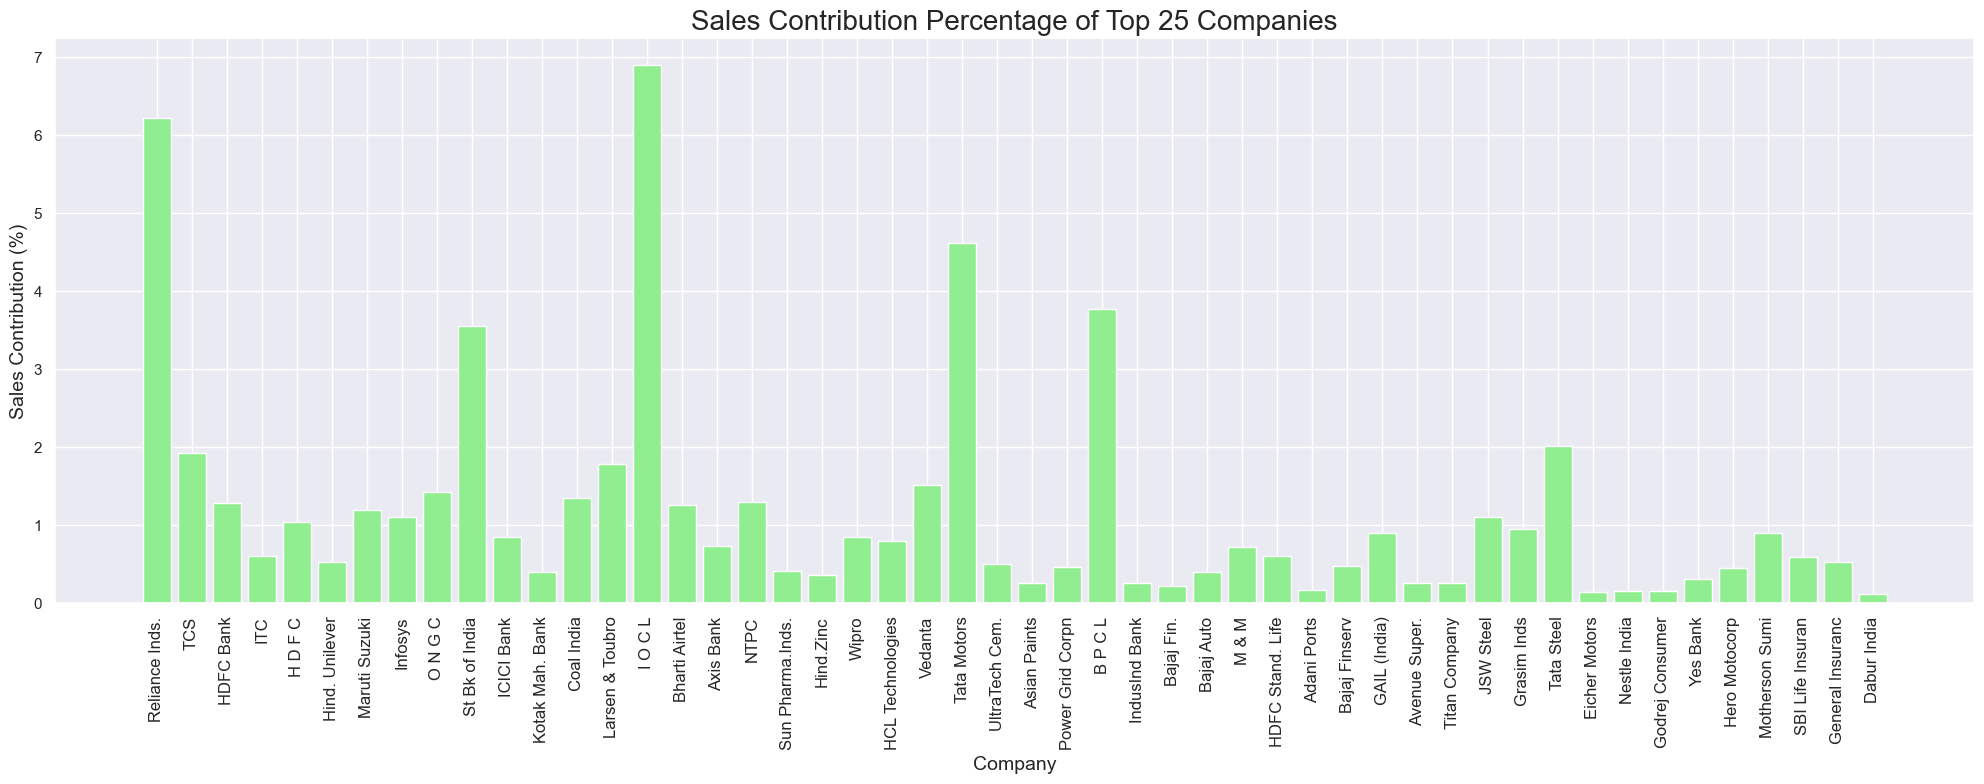

In [397]:
# Create a bar graph for sales contribution percentage
plt.figure(figsize=(20, 8))
plt.bar(top_25['Company'], top_25['Sales Contribution (%)'], color='lightgreen')
plt.xlabel('Company', fontsize=14)
plt.ylabel('Sales Contribution (%)', fontsize=14)
plt.title('Sales Contribution Percentage of Top 25 Companies', fontsize=20)
plt.xticks(rotation=90, fontsize=12)
plt.tight_layout()

# Display the bar graph
plt.show()

In [398]:
df.head(5)

,S.No.,Company,Market Capitalization,Quarterly Sales,Yearly Sales,Sales Contribution (%),Sales Rank
0,1,Reliance Inds.,583436.72,99810.00,399240.00,6.220507,2.0
1,2,TCS,563709.84,30904.00,123616.00,1.926045,9.0
2,3,HDFC Bank,482953.59,20581.27,82325.08,1.282696,15.0
3,4,ITC,320985.27,9772.02,39088.08,0.609026,38.0
4,5,H D F C,289497.37,16840.51,67362.04,1.049559,20.0


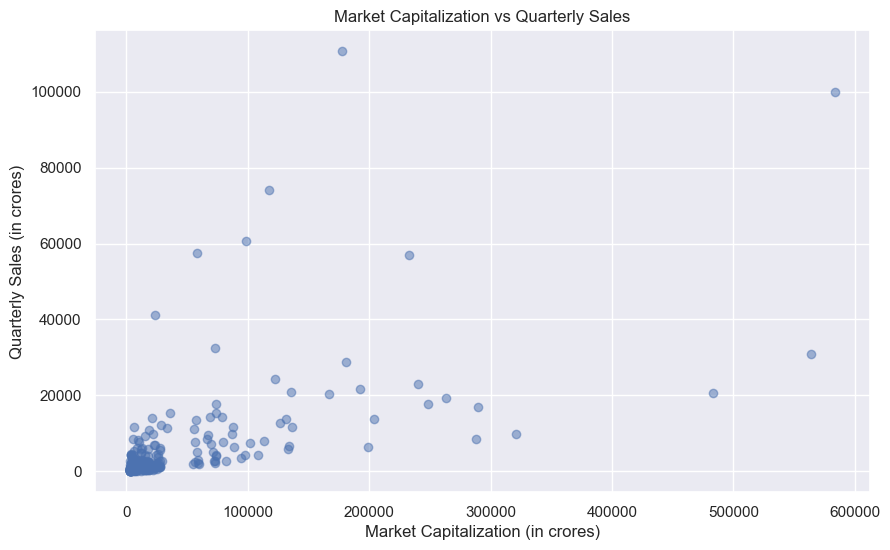

In [399]:
# Scatter plot for Market Capitalization vs Quarterly Sales
plt.figure(figsize=(10, 6))
plt.scatter(df['Market Capitalization'], df['Quarterly Sales'], alpha=0.5)
plt.title('Market Capitalization vs Quarterly Sales')
plt.xlabel('Market Capitalization (in crores)')
plt.ylabel('Quarterly Sales (in crores)')
plt.grid(True)
plt.show()

In [400]:
# Calculate the Sales-to-Market-Cap Ratio
df['Sales_to_MarketCap_Ratio'] = (df['Quarterly Sales'] / df['Market Capitalization']) * 100

print(df[['Company', 'Sales_to_MarketCap_Ratio']])

             Company  Sales_to_MarketCap_Ratio
0     Reliance Inds.                 17.107254
1                TCS                  5.482253
2          HDFC Bank                  4.261542
3                ITC                  3.044383
4            H D F C                  5.817155
..               ...                       ...
482      Prime Focus                 20.109187
483  Lak. Vilas Bank                 26.081919
484            NOCIL                  8.236900
485    Orient Cement                 16.913885
486  Natl.Fertilizer                 94.155919

[365 rows x 2 columns]


In [401]:
# Calculate the 75th percentile as the threshold
threshold = df['Sales_to_MarketCap_Ratio'].quantile(0.75)

# Filter DataFrame to include only companies with ratios above the threshold
df_filtered = df[df['Sales_to_MarketCap_Ratio'] > threshold]


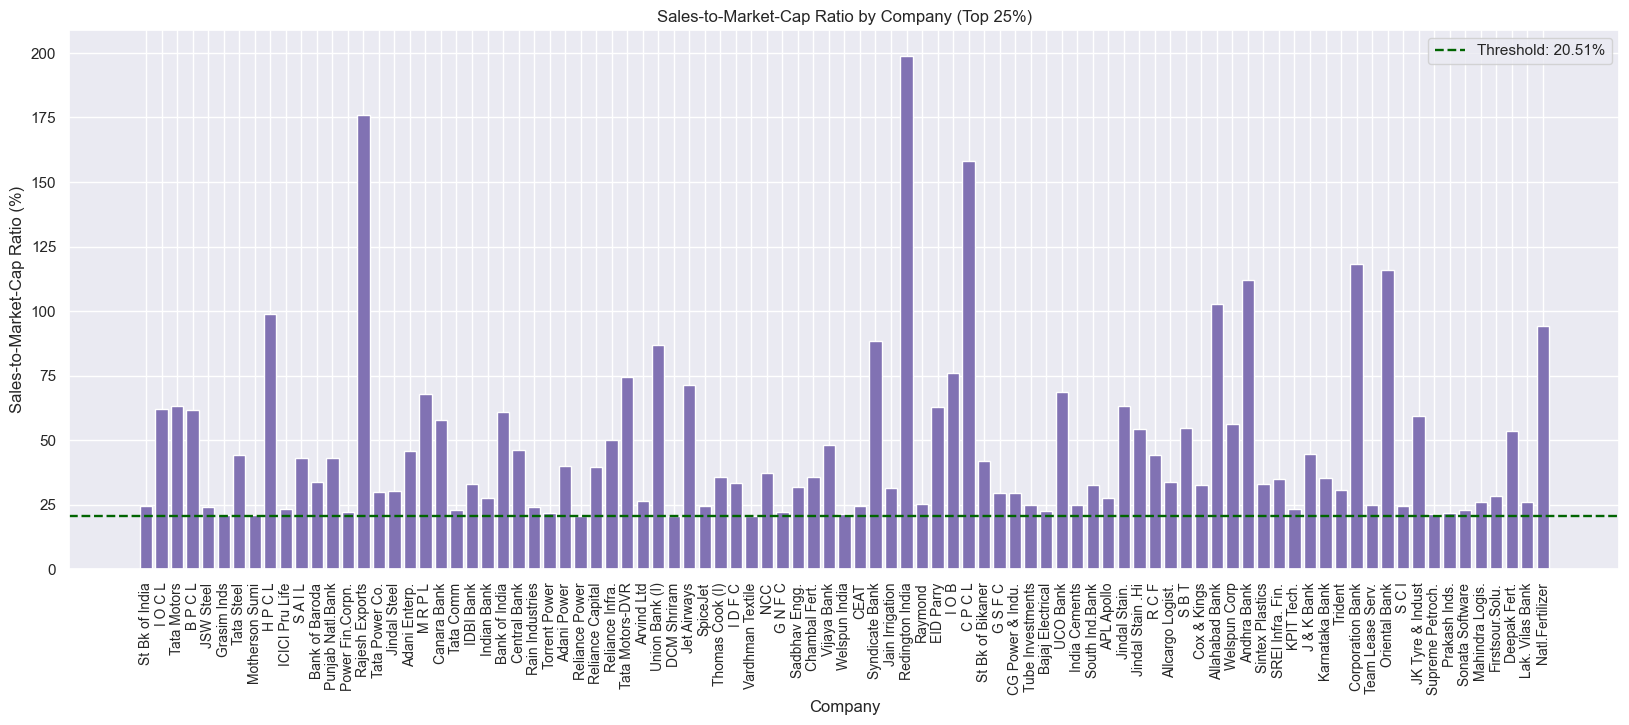

In [402]:


plt.figure(figsize=(20, 7))
plt.bar(df_filtered['Company'], df_filtered['Sales_to_MarketCap_Ratio'], color='m')
plt.title('Sales-to-Market-Cap Ratio by Company (Top 25%)')
plt.xlabel('Company')
plt.ylabel('Sales-to-Market-Cap Ratio (%)')
plt.xticks(rotation=90, fontsize=10)

# Add a horizontal line for the threshold
plt.axhline(threshold, color='darkgreen', linestyle='dashed', linewidth=1.7, label=f'Threshold: {threshold:.2f}%')
plt.legend()
# Show the plot
plt.show()


The graph shows the top 25% companies according to sales-to-market-cap ratios; companies that are above the 75th percentile are shown by magenta bars. The threshold is marked by the dashed dark green line, which highlights companies with outstanding performance.

In [403]:
df.head(2)

,S.No.,Company,Market Capitalization,Quarterly Sales,Yearly Sales,Sales Contribution (%),Sales Rank,Sales_to_MarketCap_Ratio
0,1,Reliance Inds.,583436.72,99810.0,399240.0,6.220507,2.0,17.107254
1,2,TCS,563709.84,30904.0,123616.0,1.926045,9.0,5.482253


In [405]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [406]:
#Encoding Companies Name

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [407]:
le.fit_transform(df['Company'])

array([273, 316, 134, 160, 129, 144, 220, 171, 240, 302, 153, 201,  64,
       209, 151,  40,  27, 232, 307, 146, 358, 133, 349, 323, 341,  23,
       255,  28, 169,  33,  31, 211, 135,   6,  34, 107,  26, 335, 179,
       122, 326,  90, 237, 118, 360, 140, 223, 284, 113,  75,  44, 294,
       239, 131, 154,  46, 328, 147, 361, 280,  36, 204, 259, 229, 254,
       343, 243, 279, 115, 212,  85, 196,  15, 205, 104, 250,  76, 158,
       203,  10,  92,  70,  39, 265, 325,   0, 185,  89, 114,   5,   8,
        35,  63, 168, 213, 116, 248, 263,  57,  54, 111, 191, 352, 119,
       357, 308,  99, 320, 319,  97, 156, 227, 155, 331,  79, 225,  20,
       275, 322, 120,   3, 167, 224, 132, 242, 166, 285,  37, 311, 226,
       230, 117, 188,  69, 148, 247, 261,  52, 353,  18, 305,   1, 193,
       165,  61, 187, 121, 178,  58,  50, 295, 264, 336,  81, 317, 177,
         7, 276, 271,   4, 137, 314, 127, 274,   9,  13, 246, 222, 257,
       287, 109, 110,  95, 324, 163,  21, 141, 342, 221, 194,  2

In [408]:
df['en_Company']=le.fit_transform(df['Company'])
df.head()


,S.No.,Company,Market Capitalization,Quarterly Sales,Yearly Sales,Sales Contribution (%),Sales Rank,Sales_to_MarketCap_Ratio,en_Company
0,1,Reliance Inds.,583436.72,99810.00,399240.00,6.220507,2.0,17.107254,273
1,2,TCS,563709.84,30904.00,123616.00,1.926045,9.0,5.482253,316
2,3,HDFC Bank,482953.59,20581.27,82325.08,1.282696,15.0,4.261542,134
3,4,ITC,320985.27,9772.02,39088.08,0.609026,38.0,3.044383,160
4,5,H D F C,289497.37,16840.51,67362.04,1.049559,20.0,5.817155,129


In [409]:
# Copy All Integer and Float type features from Original dataframe
df1=df[['S.No.','en_Company','Market Capitalization','Quarterly Sales', 'Sales Contribution (%)', 'Sales Rank', 'Sales_to_MarketCap_Ratio']].copy()
df1

,S.No.,en_Company,Market Capitalization,Quarterly Sales,Sales Contribution (%),Sales Rank,Sales_to_MarketCap_Ratio
0,1,273,583436.72,99810.00,6.220507,2.0,17.107254
1,2,316,563709.84,30904.00,1.926045,9.0,5.482253
2,3,134,482953.59,20581.27,1.282696,15.0,4.261542
3,4,160,320985.27,9772.02,0.609026,38.0,3.044383
4,5,129,289497.37,16840.51,1.049559,20.0,5.817155
...,...,...,...,...,...,...,...
482,495,258,3031.50,609.61,0.037993,270.0,20.109187
483,496,208,3029.57,790.17,0.049246,235.0,26.081919
484,497,231,3026.26,249.27,0.015535,343.0,8.236900
485,498,244,3024.32,511.53,0.031880,290.0,16.913885


In [410]:
# Define features and target variable
x = df[['Market Capitalization', 'Quarterly Sales', 'Sales Contribution (%)', 'Sales Rank', 'Sales_to_MarketCap_Ratio']]
y = df['Yearly Sales']

In [411]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [412]:
model=RandomForestRegressor(n_estimators=100,random_state=42)


In [413]:
model.fit(x_test,y_test)


RandomForestRegressor(random_state=42)

In [414]:
model.score(x_test,y_test)


0.9317487649307543

In [415]:
y_test


265    11158.32
33     10755.40
15     81274.40
423     1695.64
58     44091.24
         ...   
275     5184.76
121     5354.52
133    56403.92
264     2847.96
444    17048.32
Name: Yearly Sales, Length: 73, dtype: float64

In [416]:
y_pred=model.predict(x_test)
y_pred

array([ 11078.0532,  10863.5664,  83666.9596,   1720.1172,  42703.1724,
         5153.4664,   8422.1168,   2507.6456,  11002.9288,   1751.7644,
          581.5072,  59102.9772,   5636.1956,  10439.0696,   1764.7576,
         3129.3132, 285000.3968,   2444.4168,   1474.1532,   1761.2876,
       193009.6792,   2375.2944,   5712.6128,  14383.192 ,   5873.518 ,
         2533.4688,   4765.3488,   9860.2076,    560.0764,   3138.3416,
        17217.66  ,  10326.7688,  10537.7808,   2364.2256,   1819.0472,
        10535.568 ,   5932.1088, 117881.2516,   2923.8544,   1312.0068,
        22067.2988,    327.9176,  26549.382 ,  16877.4032,   9249.4164,
        12447.9692,   7169.4168,  31185.4308,  37939.2152,  29456.3192,
         9435.8888,   1756.4372,    527.4888,   2139.75  ,   4283.4828,
         1173.3512,   4783.6248,  43606.5128,   1826.5944,   6402.5544,
         2987.2284,    892.8248,   7432.0576,  56484.8112,   2768.1056,
        14940.8368,   2466.7236,   1421.0664,   5164.8856,   529

In [417]:
# Creating DataFrame for Actual and Predicted Yearly Sales
results = pd.DataFrame(x_test)
results['Actual Yearly Sales'] = y_test.reset_index(drop=True)
results['Predicted Yearly Sales'] = y_pred

print(results)


     Market Capitalization  Quarterly Sales  Sales Contribution (%)  \
265                8380.86          2789.58                0.173856   
33                81781.89          2688.85                0.167579   
15               167131.29         20318.60                1.266326   
423                3846.15           423.91                0.026420   
58                55854.68         11022.81                0.686980   
..                     ...              ...                     ...   
275                7812.73          1296.19                0.080783   
121               23537.80          1338.63                0.083428   
133               20750.78         14100.98                0.878822   
264                8389.47           711.99                0.044374   
444                3674.60          4262.08                0.265628   

     Sales Rank  Sales_to_MarketCap_Ratio  Actual Yearly Sales  \
265        93.0                 33.285128                  NaN   
33         97.0

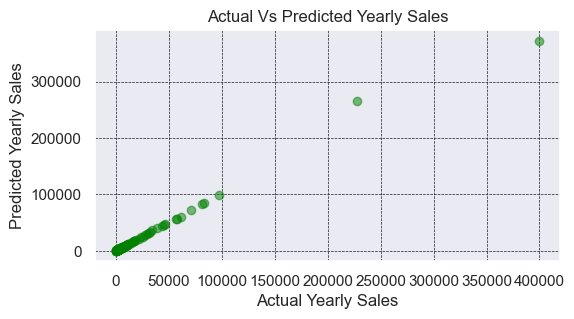

In [460]:
# Plotting Actual vs Predicted Quarterly Sales

plt.figure(figsize=(6,3))
plt.scatter(x=y_test,y=y_pred,color='green',marker='o',alpha=0.5)
plt.xlabel('Actual Yearly Sales')
plt.ylabel('Predicted Yearly Sales')
plt.title('Actual Vs Predicted Yearly Sales')
plt.grid(color='k',linestyle='--',linewidth=0.5)
plt.show()